# Homework 1
In this homework, we will have you train some convolutional neural networks! We will start with a small dataset (CIFAR), and then work our way up to TinyImageNet! This homework originally written by Daniel Gordon with very minor modifications.

# Initial Setup

This will authenticate Colab to connect to your google drive account. This way you have space to store the datasets and won't have to redownload them every time. You'll also have stable storage to save your best performing networks.

In [ ]:
from google.colab import drive
drive.mount('/gdrive/')
!ls /gdrive

Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).
MyDrive  Shareddrives


Run this code to navigate to the BASE_PATH directory and upload the homework2.tar file inside the BASE_PATH, then extract it.

Have a look at [pt_util](https://gist.github.com/pjreddie/e531394d779af2da9201096af0dba78a). We moved some of the useful functions out of the python notebook to make it less cluttered, and added a few more useful functions.

I made the BASE_PATH and DATA_PATH variables so you don't have to copy the same strings all over the place if you want to move the locations of the files around.

In [ ]:
import os

BASE_PATH = '/gdrive/My Drive/colab_files/hw1/'
if not os.path.exists(BASE_PATH):
    os.makedirs(BASE_PATH)
DATA_PATH = BASE_PATH + 'tiny_imagenet/'

!pwd
!ls
os.chdir(BASE_PATH)
if not os.path.exists(DATA_PATH + 'train.h5'):
    !wget https://courses.cs.washington.edu/courses/cse599g1/19au/files/homework2.tar
    !tar -xvf homework2.tar
    !rm homework2.tar
!pwd
!ls
os.chdir('/content')

/content
sample_data
/gdrive/My Drive/colab_files/hw1
cifar  pt_util.py  __pycache__	tiny_imagenet


# CIFAR

## Part 1: Getting the Dataset
Normally, we'd want to download our dataset first. Since PyTorch hosts the CIFAR dataset, we can load it using their helper function later.

But, we'll change DATA_PATH to an empty directory to download the dataset to.

In [ ]:
DATA_PATH = BASE_PATH + 'cifar/'

## Part 2: Defining the Network
Just like with MNIST last homework we need to define our network architecture. This time we will be using convolutional layers and maxpooling to extract features from our images before we feed those features into our final classifier.

Check out the documentation for [nn.Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html):

    nn.Conv2d(in_channels, out_channels, kernel_size, stride = 1, padding = 0,...)

So the first parameter is the number of channels in the input. Second is the number of filters we'll use (AKA number of channels in the output). Third is kernel size. Next is stride and padding which are optional and have default values.

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
import numpy as np
import os
import torch.nn.functional as F
import torch.optim as optim
import h5py
import sys
sys.path.append(BASE_PATH)
import pt_util

In [ ]:
class CifarNet(nn.Module):
    def __init__(self):
        super(CifarNet, self).__init__()
        # self.conv1 = nn.Conv2d(3, 16, 3, stride=2, padding=1)
        # self.conv2 = nn.Conv2d(16, 32, 3, stride=2, padding=1)
        # self.conv3 = nn.Conv2d(32, 64, 3, stride=2, padding=1)
        # self.fc1 = nn.Linear(1024, 10)
        # self.conv1 = nn.Conv2d(3, 8, 3, stride=1, padding=1)
        # self.conv2 = nn.Conv2d(8, 32, 3, stride=2, padding=1)
        # self.conv3 = nn.Conv2d(32, 64, 3, stride=1, padding=1)
        # self.conv4 = nn.Conv2d(64, 32, 3, stride=1, padding=1)
        # self.fc1 = nn.Linear(8192, 10)
        # self.conv1 = nn.Conv2d(3, 8, 3, stride=1, padding=1)
        # self.conv2 = nn.Conv2d(8, 16, 3, stride=2, padding=1)
        # self.conv3 = nn.Conv2d(16, 32, 3, stride=1, padding=1)
        # self.conv4 = nn.Conv2d(32, 16, 3, stride=1, padding=1)
        # self.fc1 = nn.Linear(8192, 10)
        self.conv1 = nn.Conv2d(3, 8, 3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(8, 32, 3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, stride=2, padding=1)
        self.conv4 = nn.Conv2d(64, 32, 3, stride=1, padding=1)
        self.fc1 = nn.Linear(16384, 1024)
        self.fc2 = nn.Linear(1024, 10)
        self.accuracy = None

    def forward(self, x):
        # x = self.conv1(x)
        # x = F.relu(x)
        # x = self.conv2(x)
        # x = F.relu(x)
        # x = self.conv3(x)
        # x = F.relu(x)
        # x = torch.flatten(x, 1)
        # x = self.fc1(x)
        
        # x = self.conv1(x)
        # x = F.relu(x)
        # x = self.conv2(x)
        # x = F.relu(x)
        # x = self.conv3(x)
        # x = F.relu(x)
        # x = self.conv4(x)
        # x = F.relu(x)
        # x = torch.flatten(x, 1)
        # x = self.fc1(x)

        # x = self.conv1(x)
        # x = F.relu(x)
        # x = self.conv2(x)
        # x = F.relu(x)
        # x = self.conv3(x)
        # x = F.relu(x)
        # x = self.conv4(x)
        # x = F.relu(x)
        # x = torch.flatten(x, 1)
        # x = self.fc1(x)

        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.conv3(x)
        x = F.relu(x)
        x = self.conv4(x)
        x = F.relu(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

    def loss(self, prediction, label, reduction='mean'):
        loss_val = F.cross_entropy(prediction, label.squeeze(), reduction=reduction)
        return loss_val

    def save_model(self, file_path, num_to_keep=1):
        pt_util.save(self, file_path, num_to_keep)
        
    def save_best_model(self, accuracy, file_path, num_to_keep=1):
        if self.accuracy == None or accuracy > self.accuracy:
            self.accuracy = accuracy
            self.save_model(file_path, num_to_keep)

    def load_model(self, file_path):
        pt_util.restore(self, file_path)

    def load_last_model(self, dir_path):
        return pt_util.restore_latest(self, dir_path)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This time we are giving you the train and test functions, but feel free to modify them if you want. 

You may need to return some additional information for the logging portion of this assignment.


In [ ]:
import time
def train(model, device, train_loader, optimizer, epoch, log_interval):
    model.train()
    losses = []
    for batch_idx, (data, label) in enumerate(train_loader):
        data, label = data.to(device), label.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = model.loss(output, label)
        losses.append(loss.item())
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('{} Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                time.ctime(time.time()),
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
    return np.mean(losses)

def test(model, device, test_loader, log_interval=None):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for batch_idx, (data, label) in enumerate(test_loader):
            data, label = data.to(device), label.to(device)
            output = model(data)
            test_loss_on = model.loss(output, label, reduction='sum').item()
            test_loss += test_loss_on
            pred = output.max(1)[1]
            correct_mask = pred.eq(label.view_as(pred))
            num_correct = correct_mask.sum().item()
            correct += num_correct
            if log_interval is not None and batch_idx % log_interval == 0:
                print('{} Test: [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    time.ctime(time.time()),
                    batch_idx * len(data), len(test_loader.dataset),
                    100. * batch_idx / len(test_loader), test_loss_on))

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset), test_accuracy))
    return test_loss, test_accuracy

## Part 3 and 4: Loading Data and Dataset Augmentation

In the MNIST assignment, we didn't do any data augmentation because MNIST is kind of easy.

In this assignment, you may find that data augmentation helps you a lot (or possibly hurts your performance).

You can find a bunch preimplemented here https://pytorch.org/vision/stable/transforms.html and you can also do your own as seen in the tutorial from part 3.

Play around with various data augmentations we will suggest some.

- ToPILImage - This one is useful for a lot of the built in transforms which expect PIL images. 
- RandomHorizontalFlip
- RandomResizedCrop
- ColorJitter
- RandomRotation
- Normalize
- Adding various types of noise
- ToTensor - PyTorch expects the output from the dataset to be a tensor in CxHxW format.


Note: You should be careful about which of these you apply to the test data. You usually don't want to apply noise to the test data, but you do want to normalize it in the same way for example.

In [ ]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

data_train = datasets.CIFAR10(root=DATA_PATH, train=True, download=True, transform=transform_train)
data_test = datasets.CIFAR10(root=DATA_PATH, train=False, download=True, transform=transform_test)

Files already downloaded and verified
Files already downloaded and verified


## Part 5: Training the network
Generally, it is useful to see how your training is going. Often people print their loss to make sure it goes down and their accuracy to make sure it goes up. But pictures are better than words. So for this part, you should record and plot the training loss, test loss, and test accuracy (and whatever else you want). 

We have created a very simple logging interface which essentially just saves and restores files via pickle in pt_util. Saving and restoring log data is important if you end your run early and want to continue where you left off rather than starting over.

We have also provided a plot function which can plot a single line graph. You can use it and plot each value independently, or change it to plot them all in one graph. 

Try different network architectures and experiment with hyperparameters. You'll answer the questions at the bottom of the file based on these experiments.


__Important note: Do not forget to title your graphs and label your axes. Plots are meaningless without a way to read them.__

Second Note: It will be helpful for you when deciding what network structure, data augmentation, and such work to title the graphs accordingly so you remember.

Third Note: The default setup right now saves and restores the network weights from a single folder. When you modify network architectures, you may want to increment your experiment version number so you start over with your training and log files.

Using device cuda
num cpus: 2
CifarNet(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=8192, out_features=10, bias=True)
)

Test set: Average loss: 2.3020, Accuracy: 1001/10000 (10%)

Thu Nov  4 16:26:58 2021 Train Epoch: 0 [0/50000 (0%)]	Loss: 2.300123
Thu Nov  4 16:27:09 2021 Train Epoch: 0 [25600/50000 (51%)]	Loss: 2.012558

Test set: Average loss: 1.6998, Accuracy: 3776/10000 (38%)

Saved /gdrive/My Drive/colab_files/hw1/cifar/logs/0.5/000.pt

Thu Nov  4 16:27:27 2021 Train Epoch: 1 [0/50000 (0%)]	Loss: 1.877401
Thu Nov  4 16:27:38 2021 Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.631554

Test set: Average loss: 1.4972, Accuracy: 4610/10000 (46%)

Saved /gdrive/My Drive/colab_files/hw1/cifar/logs/0.5/00

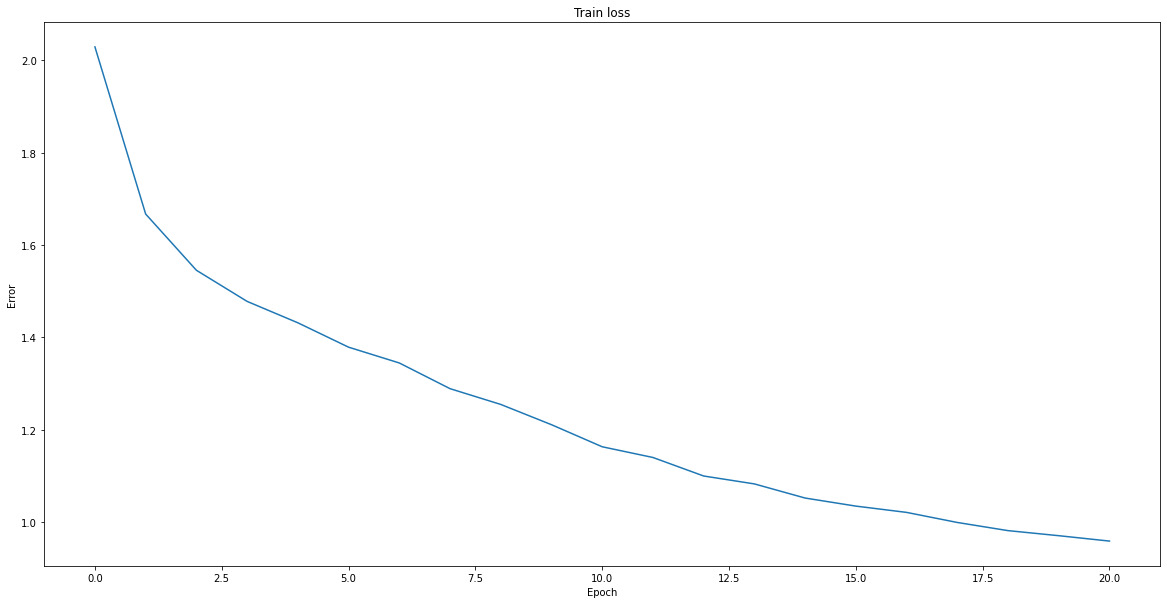

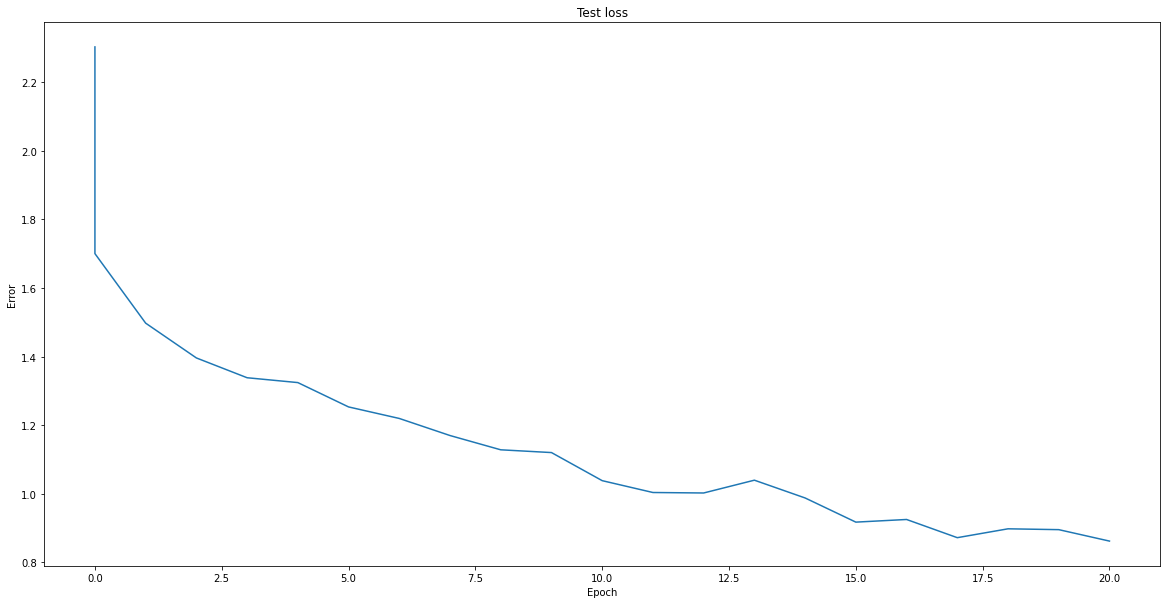

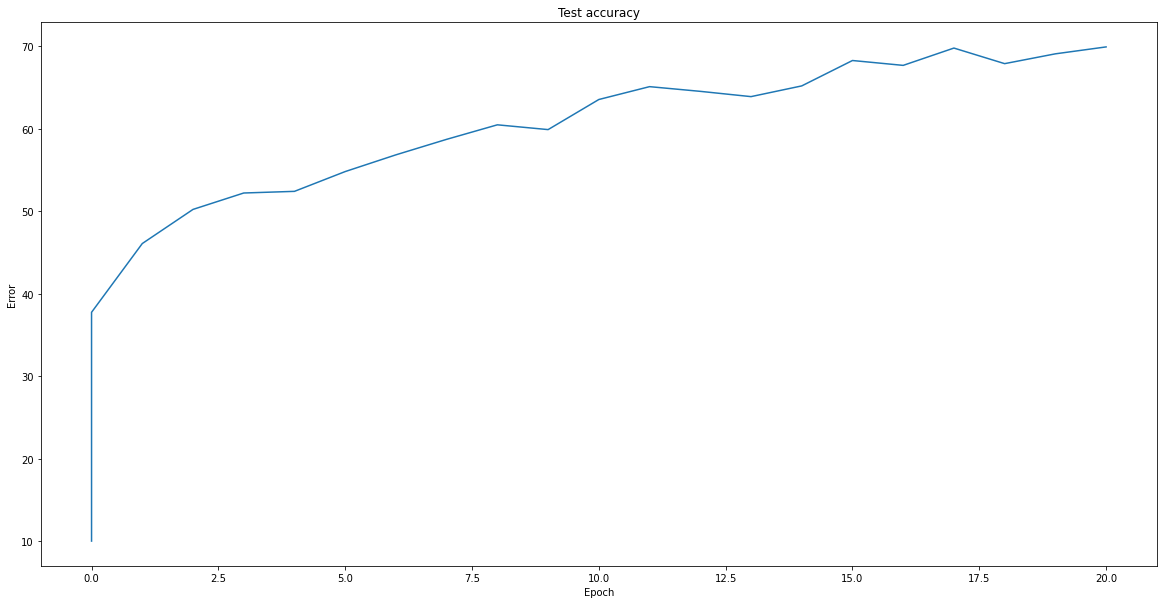

In [ ]:
# Play around with these constants, you may find a better setting. 0.2
# BATCH_SIZE = 128
# TEST_BATCH_SIZE = 10
# EPOCHS = 20
# LEARNING_RATE = 0.01
# MOMENTUM = 0.9
# USE_CUDA = True
# SEED = 0
# PRINT_INTERVAL = 100
# WEIGHT_DECAY = 0.005

# Experiment 2 0.3
# BATCH_SIZE = 256
# TEST_BATCH_SIZE = 10
# EPOCHS = 20
# LEARNING_RATE = 0.01
# MOMENTUM = 0.85
# USE_CUDA = True
# SEED = 0
# PRINT_INTERVAL = 100
# WEIGHT_DECAY = 0.005

# Experiment 3 0.4
# BATCH_SIZE = 256
# TEST_BATCH_SIZE = 10
# EPOCHS = 20
# LEARNING_RATE = 0.01
# MOMENTUM = 0.9
# USE_CUDA = True
# SEED = 0
# PRINT_INTERVAL = 100
# WEIGHT_DECAY = 0.005

# Experiment 4 0.5
BATCH_SIZE = 256
TEST_BATCH_SIZE = 10
EPOCHS = 20
LEARNING_RATE = 0.01
MOMENTUM = 0.85
USE_CUDA = True
SEED = 0
PRINT_INTERVAL = 100
WEIGHT_DECAY = 0.005

EXPERIMENT_VERSION = "0.5" # increment this to start a new experiment
LOG_PATH = DATA_PATH + 'logs/' + EXPERIMENT_VERSION + '/'

# Now the actual training code
use_cuda = USE_CUDA and torch.cuda.is_available()

#torch.manual_seed(SEED)

device = torch.device("cuda" if use_cuda else "cpu")
print('Using device', device)
import multiprocessing
print('num cpus:', multiprocessing.cpu_count())

kwargs = {'num_workers': multiprocessing.cpu_count(),
          'pin_memory': True} if use_cuda else {}

class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

train_loader = torch.utils.data.DataLoader(data_train, batch_size=BATCH_SIZE,
                                           shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(data_test, batch_size=TEST_BATCH_SIZE,
                                          shuffle=False, **kwargs)

model = CifarNet().to(device)
print(model)
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM, weight_decay=WEIGHT_DECAY)
start_epoch = model.load_last_model(LOG_PATH)

train_losses, test_losses, test_accuracies = pt_util.read_log(LOG_PATH + 'log.pkl', ([], [], []))
test_loss, test_accuracy = test(model, device, test_loader)

test_losses.append((start_epoch, test_loss))
test_accuracies.append((start_epoch, test_accuracy))

try:
    for epoch in range(start_epoch, EPOCHS + 1):
        train_loss = train(model, device, train_loader, optimizer, epoch, PRINT_INTERVAL)
        test_loss, test_accuracy = test(model, device, test_loader)
        train_losses.append((epoch, train_loss))
        test_losses.append((epoch, test_loss))
        test_accuracies.append((epoch, test_accuracy))
        pt_util.write_log(LOG_PATH + 'log.pkl', (train_losses, test_losses, test_accuracies))
        model.save_best_model(test_accuracy, LOG_PATH + '%03d.pt' % epoch)


except KeyboardInterrupt as ke:
    print('Interrupted')
except:
    import traceback
    traceback.print_exc()
finally:
    model.save_model(LOG_PATH + '%03d.pt' % epoch, 0)
    ep, val = zip(*train_losses)
    pt_util.plot(ep, val, 'Train loss', 'Epoch', 'Error')
    ep, val = zip(*test_losses)
    pt_util.plot(ep, val, 'Test loss', 'Epoch', 'Error')
    ep, val = zip(*test_accuracies)
    pt_util.plot(ep, val, 'Test accuracy', 'Epoch', 'Error')


##CIFAR Questions

1. What design that you tried worked the best? This includes things like network design, learning rate, batch size, number of epochs, and other optimization parameters, data augmentation etc. What was the final train loss? Test loss? Test Accuracy? Provide the plots for train loss, test loss, and test accuracy.

The design that worked best had the following network architecture and hyperparameters: 

```
# self.conv1 = nn.Conv2d(3, 8, 3, stride=1, padding=1)
# self.conv2 = nn.Conv2d(8, 16, 3, stride=2, padding=1)
# self.conv3 = nn.Conv2d(16, 32, 3, stride=1, padding=1)
# self.conv4 = nn.Conv2d(32, 16, 3, stride=1, padding=1)
# self.fc1 = nn.Linear(8192, 10)
```



```
BATCH_SIZE = 256
TEST_BATCH_SIZE = 10
EPOCHS = 20
LEARNING_RATE = 0.01
MOMENTUM = 0.9
USE_CUDA = True
SEED = 0
PRINT_INTERVAL = 100
WEIGHT_DECAY = 0.005
```

Our hunch is that this performed the best due to the gradual decrease of channel space between the third and fourth layers, as well as the smaller stride throughout, allowing the model to better fit to the training data. 

Train Loss 0.97
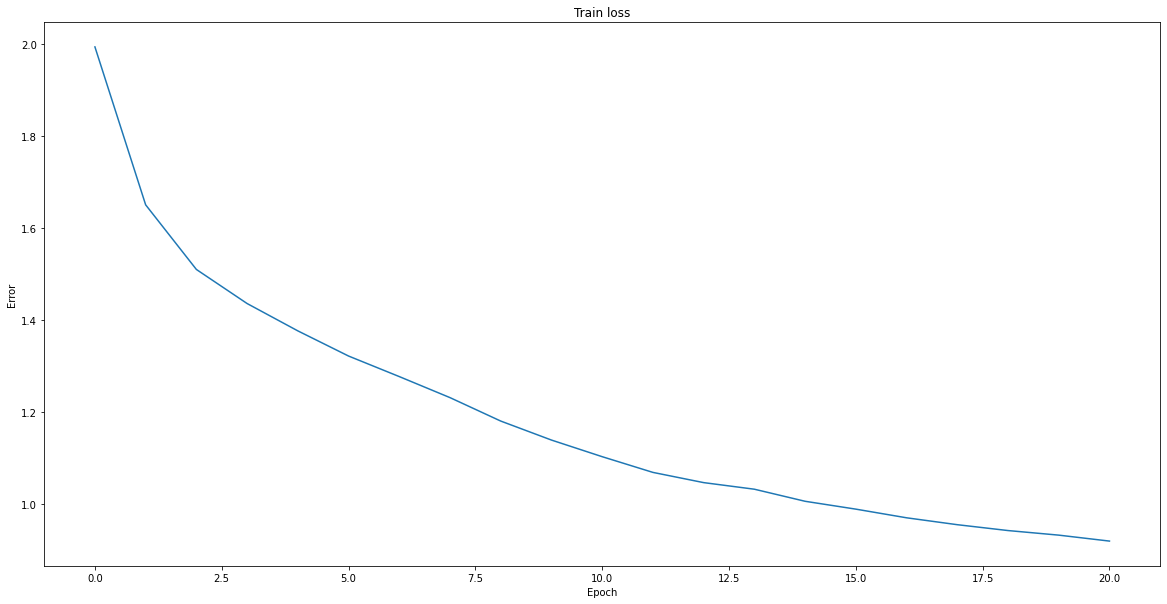
Test Loss 0.85
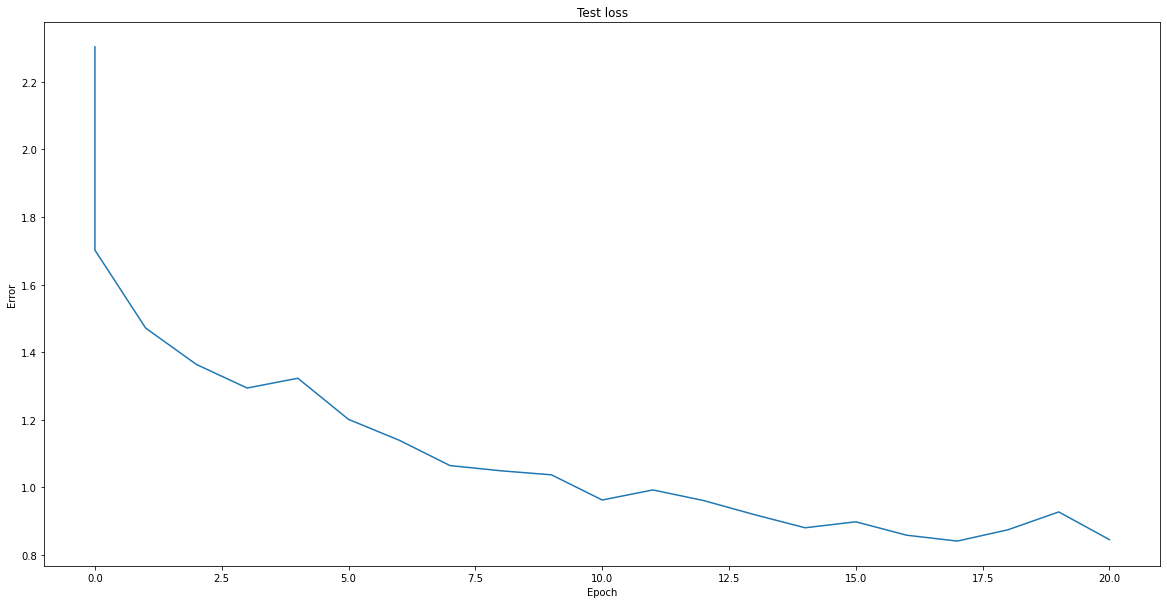
Test Accuracy 71%
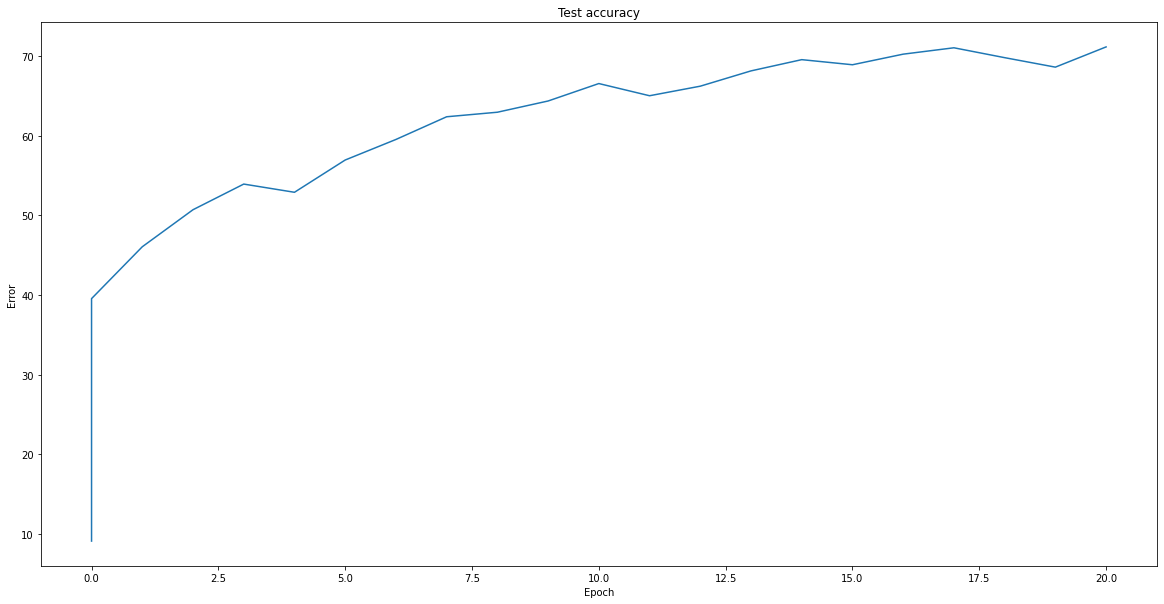

2. What design worked the worst (but still performed better than random chance)? Provide all the same information as question 1.

The model that worked the worst had the following network architecture and hyperparameter configuration: 

```
self.conv1 = nn.Conv2d(3, 8, 3, stride=1, padding=1)
self.conv2 = nn.Conv2d(8, 32, 3, stride=1, padding=1)
self.conv3 = nn.Conv2d(32, 64, 3, stride=2, padding=1)
self.conv4 = nn.Conv2d(64, 32, 3, stride=1, padding=1)
self.fc1 = nn.Linear(16384, 1024)
self.fc2 = nn.Linear(1024, 10)
```

```
BATCH_SIZE = 256
TEST_BATCH_SIZE = 10
EPOCHS = 20
LEARNING_RATE = 0.01
MOMENTUM = 0.85
USE_CUDA = True
SEED = 0
PRINT_INTERVAL = 100
WEIGHT_DECAY = 0.005
```
In this case, we attempted to further apply our narrowing technique by adding a smaller step fully connected layer before the output. 

Train Loss 0.949
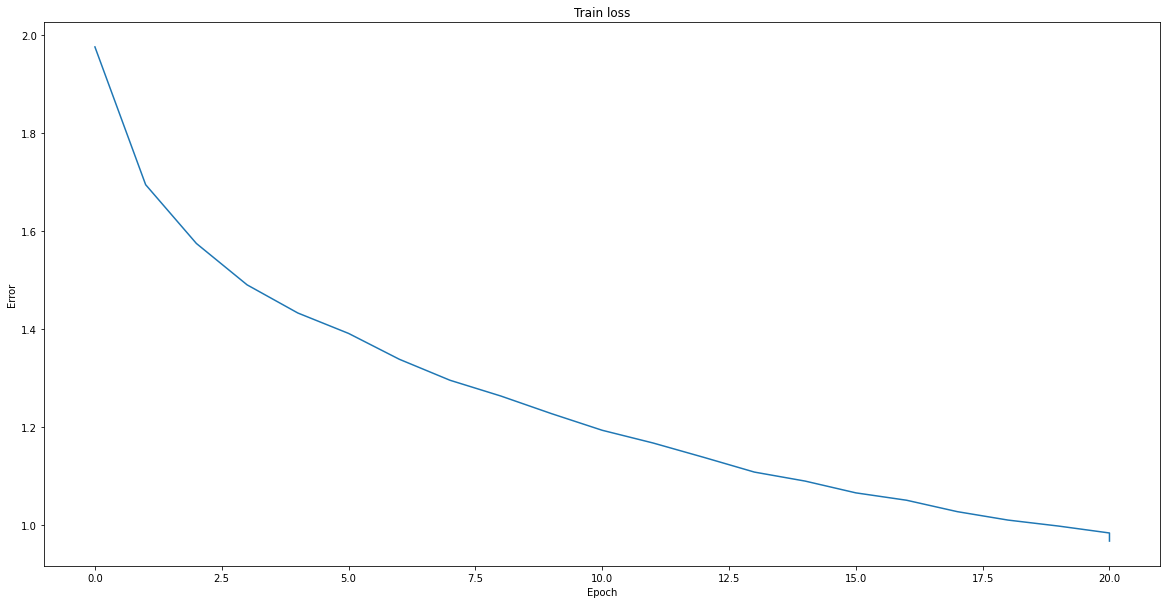
Test Loss 0.8623
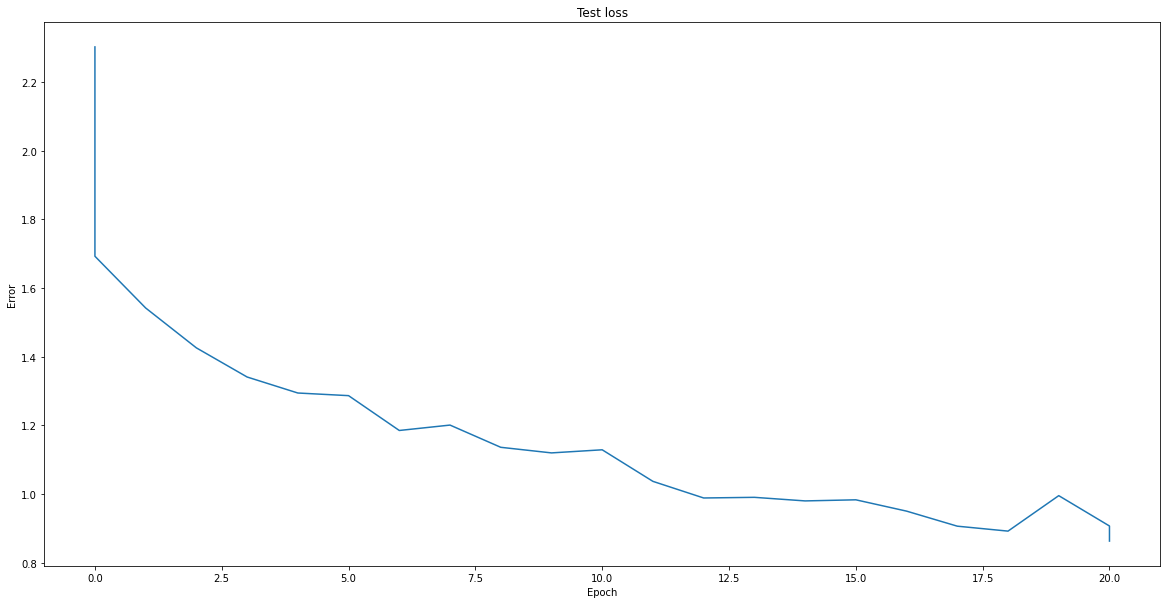
Test Accuracy 70%
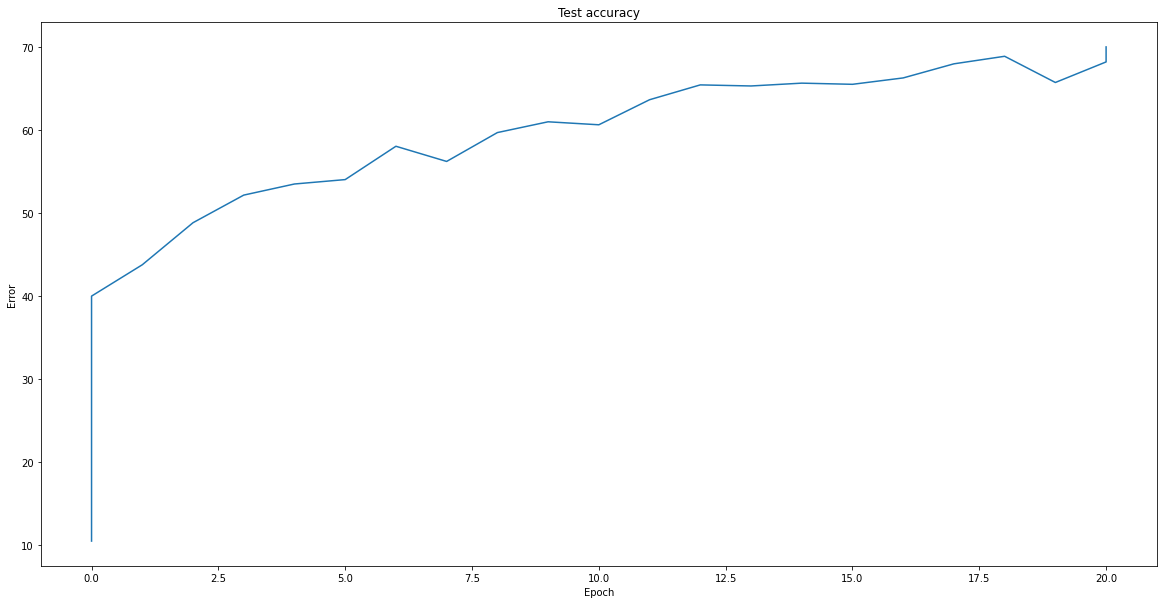

3. Why do you think the best one worked well and the worst one worked poorly.

We think the best one worked well due to the addition of an additional convolutional layer. Our intention, as we specified in previous prompts, with this layer was to provide an addition step down before reaching the fully connected layer which just maps directly down to our output dimensions. We believed that a convolutional layer would work to add further granularity to the nuances of the data that the model learns, and add another dimension to what aspect of the data set the model is learning (like we saw with how CNNs first process large shapes, then distinct features, then semantics behind features as information moves through the CNN). We think that in the case with the worst performance, we may have pushed this principle too far by adding another fully connected layer, which may have resulted in overfitting as well as too much granularity towards the end of the network that may have made the model more susceptible to large variances. The worse performance could also be a result of the fact that we kept most hyperparameters similar between the two. Perhaps if we trained for more epochs, the latter model would have overtaken the former model.


---
# TinyImageNet

## Part 1: Upload the Dataset
Change the DATA_PATH to the path of the TinyImageNet dataset we downloaded earlier.

In [ ]:
DATA_PATH = BASE_PATH + 'tiny_imagenet/'

## Part 2: Defining the Network
We're giving you no instructions on this part. Welcome to deep learning research! See if you can get above 40% accuracy. You probably want to use the Cross Entropy error again, but who knows, maybe you can find a better loss function. We will give you a few hints of things to try:

- Maxpooling
- Activation functions other than ReLU
- Batch Norm
- Dropout
- Residual connections

To define your network you'll have to figure out more about the Tiny ImageNet dataset. Specifically, what size are the images you'll be processing? How big is your label space? You can find this out by examining samples of your data.

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
import numpy as np
import os
import torch.nn.functional as F
import torch.optim as optim
import h5py
import sys
sys.path.append(BASE_PATH)
import pt_util

In [ ]:
class TinyImagenetNet(nn.Module):
    def __init__(self):
        super(TinyImagenetNet, self).__init__()
        # TODO define the layers
        # Experiment 1: 0.1
        
        self.conv1 = nn.Conv2d(3, 32, 3, stride=1, padding=1)
        self.maxpool1 = nn.MaxPool2d(3, 1, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(64, 256, 3, stride=2, padding=1)
        self.conv4 = nn.Conv2d(256, 128, 3, stride=1, padding=1)
        self.maxpool2 = nn.MaxPool2d(9, 1, 1)
        self.fc1 = nn.Linear(12800, 512)
        self.fc2 = nn.Linear(512, 200)

        # self.conv1 = nn.Conv2d(3, 32, 7, stride=4, padding=3)
        # self.maxpool1 = nn.MaxPool2d(3, 2, 1)
        # self.conv2 = nn.Conv2d(32, 64, 5, stride=3, padding=2)
        # self.conv3 = nn.Conv2d(64, 256, 3, stride=2, padding=1)
        # self.conv4 = nn.Conv2d(256, 256, 1, stride=1, padding=0)
        # self.fc1 = nn.Linear(1024, 512)
        # self.fc2 = nn.Linear(512, 200)
        

        # Experiment 2: 0.3
        """
        self.conv1 = nn.Conv2d(3, 64, 3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(64, 64, 3, stride=1, padding=1)
        self.maxpool1 = nn.MaxPool2d(3, 2, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 128, 3, stride=1, padding=1)
        self.maxpool2 = nn.MaxPool2d(3, 2, 1)
        self.conv5 = nn.Conv2d(128, 256, 3, stride=1, padding=1)
        self.conv6 = nn.Conv2d(256, 256, 3, stride=1, padding=1)
        self.maxpool3 = nn.MaxPool2d(3, 2, 1)
        self.fc1 = nn.Linear(16384, 4096)
        self.fc2 = nn.Linear(4096, 200)
        """

        # Experiment 3: 0.6
        """
        self.conv1 = nn.Conv2d(3, 64, 3, stride=2, padding=1)
        self.maxpool1 = nn.MaxPool2d(3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(64, 256, 3, stride=2, padding=1)
        self.batch_norm1 = nn.BatchNorm2d(256)
        self.maxpool2 = nn.MaxPool2d(3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(256, 2048, 3, stride=2, padding=1)
        self.batch_norm2 = nn.BatchNorm2d(2048)
        self.dropout = nn.Dropout2d()
        self.maxpool3 = nn.MaxPool2d(3, stride=2, padding=1)
        self.conv4 = nn.Conv2d(2048, 16384, 3, stride=2, padding=1)
        self.fc1 = nn.Linear(16384, 4096)
        self.fc2 = nn.Linear(4096, 2048)
        self.fc3 = nn.Linear(2048, 200)
        """

        # Experiment 4: 0.8
        # self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        # self.conv2 = nn.Conv2d(64, 64, 3, padding=1)
        # self.mp1 = nn.MaxPool2d(2, stride=2)
        # self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        # self.conv4 = nn.Conv2d(128, 128, 3, padding=1)
        # self.conv5 = nn.Conv2d(128, 128, 3, padding=1)
        # self.mp2 = nn.MaxPool2d(2, stride=2)
        # self.conv6 = nn.Conv2d(128, 256, 3, padding=1)
        # self.conv7 = nn.Conv2d(256, 256, 3, padding=1)
        # self.conv8 = nn.Conv2d(256, 256, 3, padding=1)
        # self.mp3 = nn.MaxPool2d(2, stride=2)
        # self.fc1 = nn.Linear(16384, 2048)
        # self.fc2 = nn.Linear(2048, 2048)
        # self.fc3 = nn.Linear(2048, 200)

        self.accuracy = None

    def forward(self, x):
        # TODO define the forward pass

        # Experiment 4: 0.8
        # x = self.conv1(x)
        # x = F.relu(x)
        # x = self.conv2(x)
        # x = F.relu(x)
        # x = self.mp1(x)
        # x = self.conv3(x)
        # x = F.relu(x)
        # x = self.conv4(x)
        # x = F.relu(x)
        # x = self.conv5(x)
        # x = F.relu(x)
        # x = self.mp2(x)
        # x = self.conv6(x)
        # x = F.relu(x)
        # x = self.conv7(x)
        # x = F.relu(x)
        # x = self.conv8(x)
        # x = F.relu(x)
        # x = self.mp3(x)
        # x = torch.flatten(x, 1)
        # x = self.fc1(x)
        # x = F.relu(x)
        # x = self.fc2(x)
        # x = F.relu(x)
        # x = self.fc3(x)

        # Experiment 1: 0.1
        
        x = self.conv1(x)
        x = F.leaky_relu(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = F.leaky_relu(x)
        x = self.conv3(x)
        x = F.leaky_relu(x)
        x = self.conv4(x)
        x = F.leaky_relu(x)
        x = self.maxpool2(x)
        x = F.leaky_relu(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        

        # Experiment 2: 0.3
        """
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.leaky_relu(x)
        x = self.maxpool1(x)
        x = self.conv3(x)
        x = F.relu(x)
        x = self.conv4(x)
        x = F.leaky_relu(x)
        x = self.maxpool2(x)
        x = self.conv5(x)
        x = F.relu(x)
        x = self.conv6(x)
        x = F.leaky_relu(x)
        x = self.maxpool3(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = F.softmax(x)
        """

        # Experiment 3: 0.6
        """
        x = self.conv1(x)
        x = F.leaky_relu(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.batch_norm1(x)
        x = F.leaky_relu(x)
        x = self.dropout(x)
        x = self.maxpool2(x)
        x = self.conv3(x)
        x = self.batch_norm2(x)
        x = F.leaky_relu(x)
        x = self.dropout(x)
        x = self.maxpool3(x)
        x = self.conv4(x)
        x = F.leaky_relu(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x)
        """

        return x

    def loss(self, prediction, label, reduction='mean'):
        loss_val = F.cross_entropy(prediction, label.squeeze(), reduction=reduction)
        return loss_val

    def save_model(self, file_path, num_to_keep=1):
        pt_util.save(self, file_path, num_to_keep)
        
    def save_best_model(self, accuracy, file_path, num_to_keep=1):
        if self.accuracy == None or accuracy > self.accuracy:
            self.accuracy = accuracy
            self.save_model(file_path, num_to_keep)

    def load_model(self, file_path):
        pt_util.restore(self, file_path)

    def load_last_model(self, dir_path):
        return pt_util.restore_latest(self, dir_path)


This time we are giving you the train and test functions, but feel free to modify them if you want. 

You may need to return some additional information for the logging portion of this assignment.


In [ ]:
import time
def train(model, device, train_loader, optimizer, epoch, log_interval):
    model.train()
    losses = []
    for batch_idx, (data, label) in enumerate(train_loader):
        data, label = data.to(device), label.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = model.loss(output, label)
        losses.append(loss.item())
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('{} Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                time.ctime(time.time()),
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
    return np.mean(losses)

def test(model, device, test_loader, return_images=False, log_interval=None):
    model.eval()
    test_loss = 0
    correct = 0

    correct_images = []
    correct_values = []

    error_images = []
    predicted_values = []
    gt_values = []
    with torch.no_grad():
        for batch_idx, (data, label) in enumerate(test_loader):
            data, label = data.to(device), label.to(device)
            output = model(data)
            test_loss_on = model.loss(output, label, reduction='sum').item()
            test_loss += test_loss_on
            pred = output.max(1)[1]
            correct_mask = pred.eq(label.view_as(pred))
            num_correct = correct_mask.sum().item()
            correct += num_correct
            if return_images:
                if num_correct > 0:
                    correct_images.append(data[correct_mask, ...].data.cpu().numpy())
                    correct_value_data = label[correct_mask].data.cpu().numpy()[:, 0]
                    correct_values.append(correct_value_data)
                if num_correct < len(label):
                    error_data = data[~correct_mask, ...].data.cpu().numpy()
                    error_images.append(error_data)
                    predicted_value_data = pred[~correct_mask].data.cpu().numpy()
                    predicted_values.append(predicted_value_data)
                    gt_value_data = label[~correct_mask].data.cpu().numpy()[:, 0]
                    gt_values.append(gt_value_data)
            if log_interval is not None and batch_idx % log_interval == 0:
                print('{} Test: [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    time.ctime(time.time()),
                    batch_idx * len(data), len(test_loader.dataset),
                    100. * batch_idx / len(test_loader), test_loss_on))
    if return_images:
        correct_images = np.concatenate(correct_images, axis=0)
        error_images = np.concatenate(error_images, axis=0)
        predicted_values = np.concatenate(predicted_values, axis=0)
        correct_values = np.concatenate(correct_values, axis=0)
        gt_values = np.concatenate(gt_values, axis=0)

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset), test_accuracy))
    if return_images:
        return test_loss, test_accuracy, correct_images, correct_values, error_images, predicted_values, gt_values
    else:
        return test_loss, test_accuracy


## Part 3: Loading Data
PyTorch has a nice interface for dealing with a variety of data. You can read a good tutorial here https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
Your friendly neighborhood TAs have made it even easier by preprocessing the data into a nice format. The data you uploaded is stored using hdf5 files which can be accessed a lot like Numpy arrays using the h5py package. In each of the files, there is a "dataset" called 'images', and one called 'labels'. Read more about h5py here http://docs.h5py.org/en/latest/quick.html

Hints:
1. HDF5s don't support concurrent accesses.
2. If you don't close the HDF5 file, you will still have problems with concurrency.
3. One way to deal with concurrent accesses is to copy the entirety of the data into each process separately. Then each process accesses its own copy of the data. https://stackoverflow.com/questions/40449659/does-h5py-read-the-whole-file-into-memory
4. Speed hint: With small datasets, it is almost always a good idea to cache the data to disk rather than continually read from files.


In [ ]:
# Data loader
class H5Dataset(torch.utils.data.Dataset):
    def __init__(self, h5_file, transform=None):
        self.transform = transform
        self.h5_file = h5py.File(h5_file, 'r')
        self.images = self.h5_file['images'][:]
        self.labels = torch.LongTensor(self.h5_file['labels'][:])
        
    def __len__(self):
        return self.labels.shape[0]
      
    def __getitem__(self, idx):
        data = self.images[idx]
        label = self.labels[idx]
        
        if self.transform:
            data = self.transform(data)
        return (data, label)


## Part 4: Dataset Augmentation
In the MNIST assignment, we didn't do any data augmentation because MNIST is kind of easy.

In this assignment, you may find that data augmentation helps you a lot (or possibly hurts your performance).

You can find a bunch preimplemented here https://pytorch.org/docs/stable/torchvision/transforms.html and you can also do your own as seen in the tutorial from part 3.

Play around with various data augmentations we will suggest some.

- ToPILImage - This one is useful for a lot of the built in transforms which expect PIL images. 
- RandomHorizontalFlip
- RandomResizedCrop
- ColorJitter
- RandomRotation
- Normalize
- Adding various types of noise
- ToTensor - PyTorch expects the output from the dataset to be a tensor in CxHxW format.


Note: You should be careful about which of these you apply to the test data. You usually don't want to apply noise to the test data, but you do want to normalize it in the same way for example.


In [ ]:
train_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])

test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])

data_train = H5Dataset(DATA_PATH + 'train.h5', transform=train_transforms)
print(len(data_train))
data_test = H5Dataset(DATA_PATH + 'val.h5', transform=test_transforms)
print(len(data_test))


100000
8000


In [ ]:
# Size of label space in train
print(np.unique(np.array([im[-1].numpy() for im in data_train])))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199]


In [ ]:
# Size of label space in test
print(np.unique(np.array([im[-1].numpy() for im in data_test])))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199]


In [ ]:
print(data_train[0][0].shape) # image size

torch.Size([3, 64, 64])


## Part 5: Training the network
Generally, it is useful to see how your training is going. Often people print their loss to make sure it goes down and their accuracy to make sure it goes up. But pictures are better than words. So for this part, you should record and plot the training loss, test loss, and test accuracy (and whatever else you want). 

We have created a very simple logging interface which essentially just saves and restores files via pickle in pt_util. Saving and restoring log data is important if you end your run early and want to continue where you left off rather than starting over.

We have also provided a plot function which can plot a single line graph. You can use it and plot each value independently, or change it to plot them all in one graph. 


__Important note: Do not forget to title your graphs and label your axes. Plots are meaningless without a way to read them.__

Second Note: It will be helpful for you when deciding what network structure, data augmentation, and such work to title the graphs accordingly so you remember.
Third Note: The default setup right now saves and restores the network weights from a single folder. When you modify network architectures, you may want to save the resulting files in different folders (with appropriate names).

We also provided a function for showing some results, because it's not satisfying to train a neural net, you also want to see what it can do! This can also be useful for figuring out what your network is doing well, and what it is failing at. This type of error analysis is very common when training neural networks.


Using device cuda
num cpus: 2

Test set: Average loss: 5.2987, Accuracy: 56/8000 (1%)



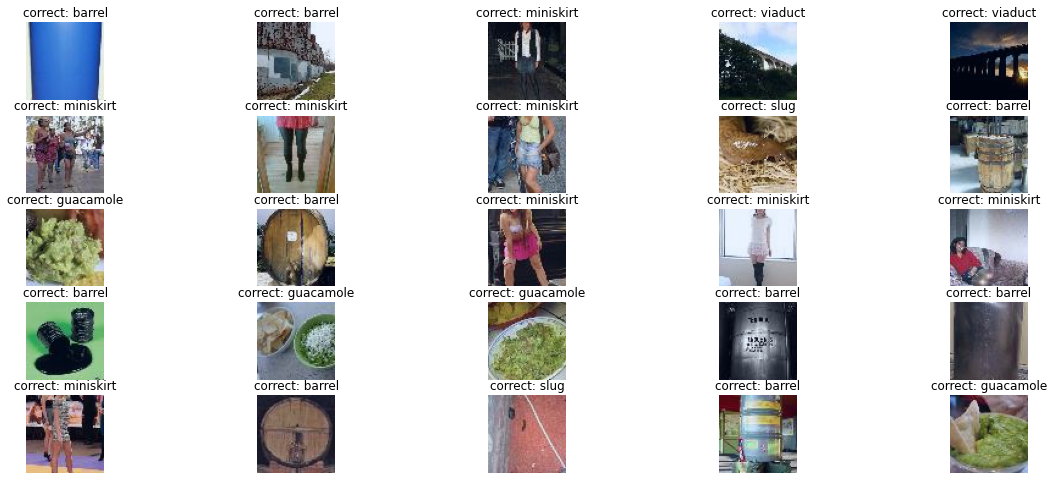

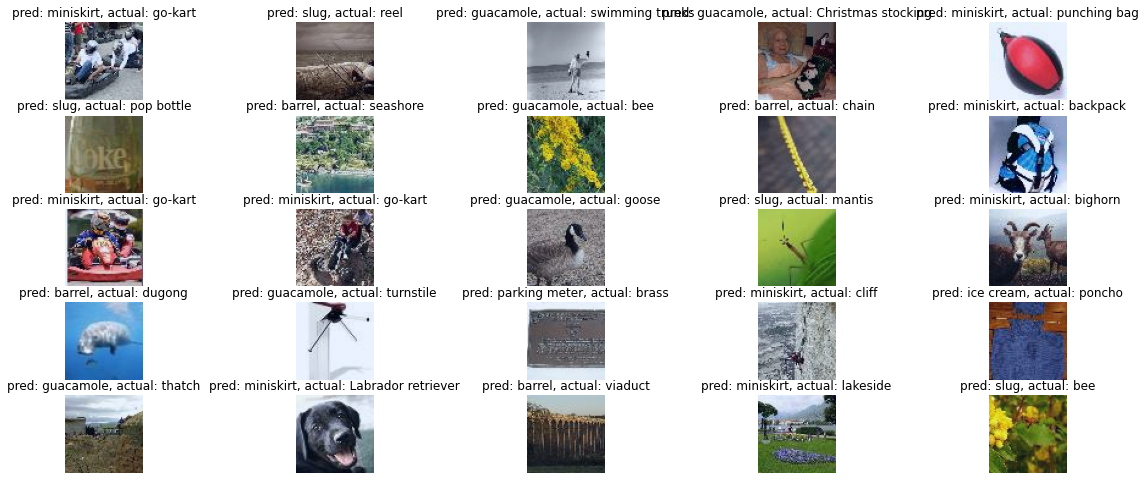

Thu Nov  4 22:01:00 2021 Train Epoch: 0 [0/100000 (0%)]	Loss: 5.296825
Thu Nov  4 22:01:31 2021 Train Epoch: 0 [25600/100000 (26%)]	Loss: 5.294209
Thu Nov  4 22:02:02 2021 Train Epoch: 0 [51200/100000 (51%)]	Loss: 5.284243
Thu Nov  4 22:02:33 2021 Train Epoch: 0 [76800/100000 (77%)]	Loss: 5.102482

Test set: Average loss: 4.9218, Accuracy: 267/8000 (3%)

Saved /gdrive/My Drive/colab_files/hw1/tiny_imagenet/logs/0.1/000.pt

Thu Nov  4 22:03:17 2021 Train Epoch: 1 [0/100000 (0%)]	Loss: 4.972476
Thu Nov  4 22:03:48 2021 Train Epoch: 1 [25600/100000 (26%)]	Loss: 4.643800
Thu Nov  4 22:04:20 2021 Train Epoch: 1 [51200/100000 (51%)]	Loss: 4.624596
Thu Nov  4 22:04:51 2021 Train Epoch: 1 [76800/100000 (77%)]	Loss: 4.359988

Test set: Average loss: 4.1620, Accuracy: 986/8000 (12%)

Saved /gdrive/My Drive/colab_files/hw1/tiny_imagenet/logs/0.1/001.pt

Thu Nov  4 22:05:34 2021 Train Epoch: 2 [0/100000 (0%)]	Loss: 4.006835
Thu Nov  4 22:06:06 2021 Train Epoch: 2 [25600/100000 (26%)]	Loss: 4.02849

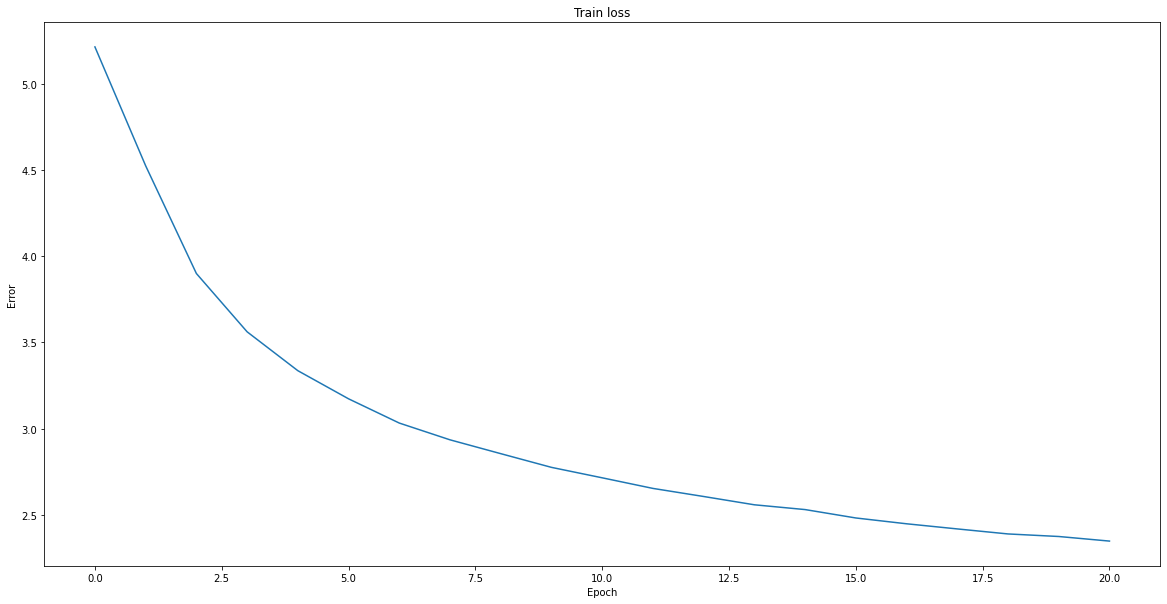

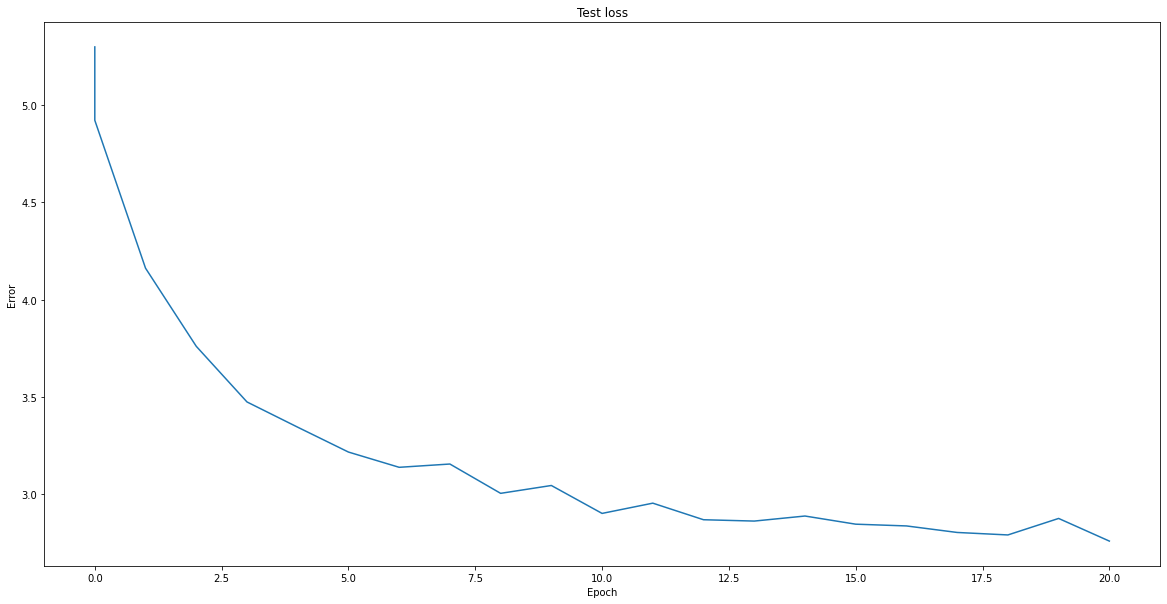

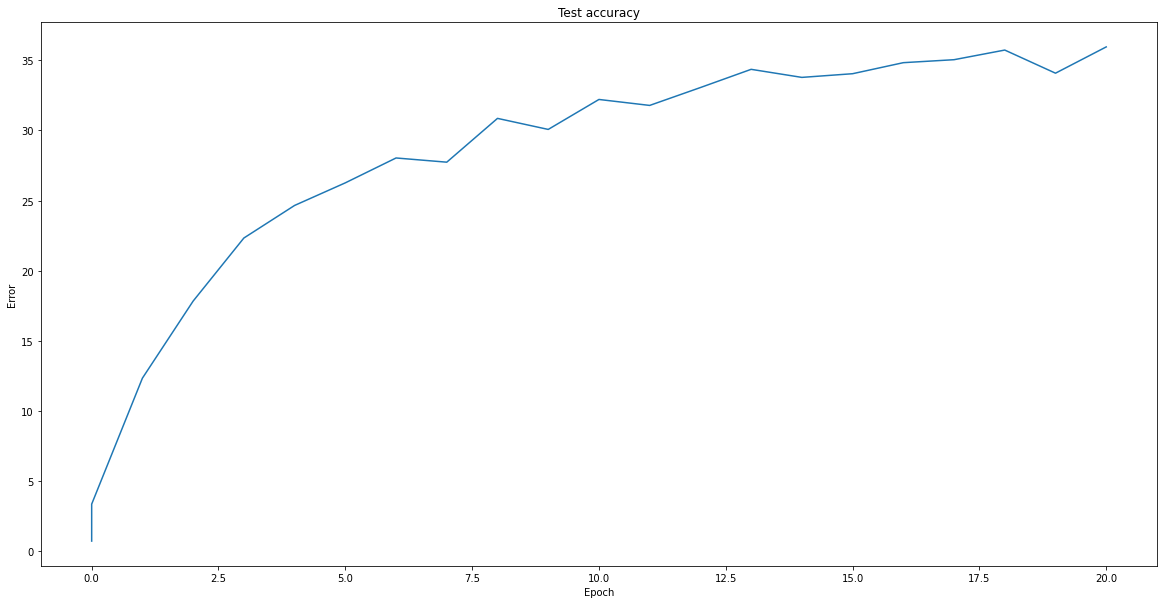

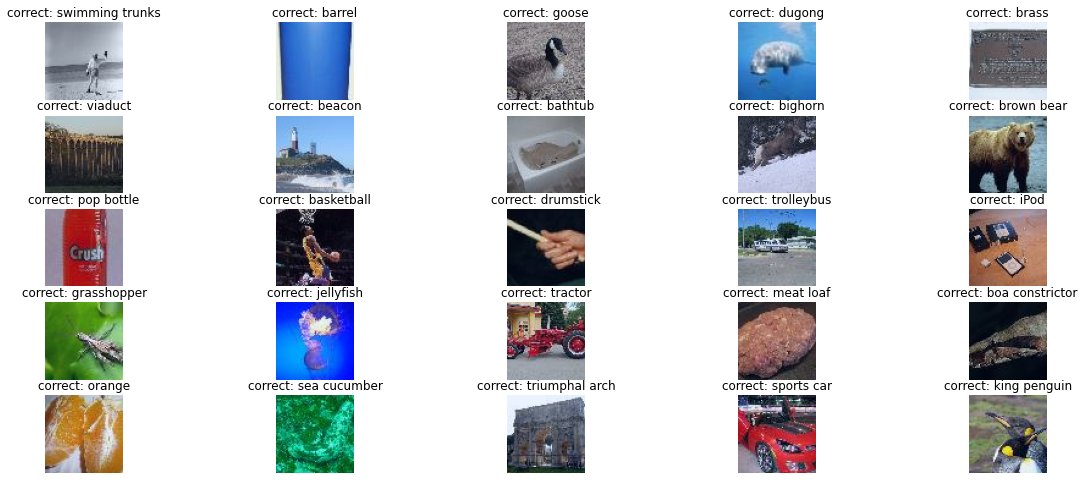

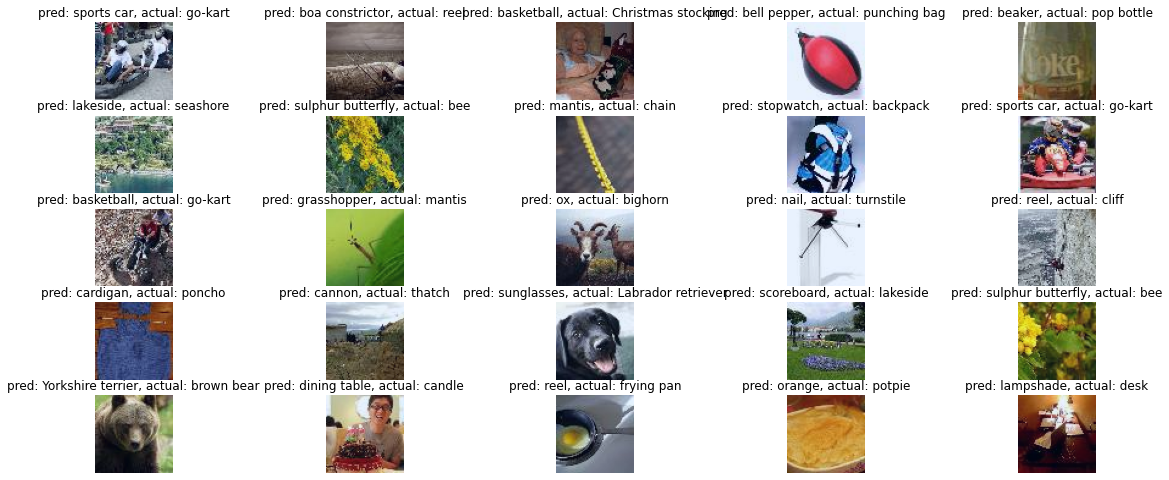

In [ ]:
# Play around with these constants, you may find a better setting.

# Experiment 1: 0.1

BATCH_SIZE = 256
TEST_BATCH_SIZE = 10
EPOCHS = 20
LEARNING_RATE = 0.01
MOMENTUM = 0.9
USE_CUDA = True
SEED = 0
PRINT_INTERVAL = 100
WEIGHT_DECAY = 0.005


# Experiment 2: 0.3
"""
BATCH_SIZE = 256
TEST_BATCH_SIZE = 10
EPOCHS = 20
LEARNING_RATE = 0.02
MOMENTUM = 0.9
USE_CUDA = True
SEED = 0
PRINT_INTERVAL = 100
WEIGHT_DECAY = 0.005
"""

# Experiment 3: 0.6
"""
BATCH_SIZE = 256
TEST_BATCH_SIZE = 10
EPOCHS = 20
LEARNING_RATE = 0.01
MOMENTUM = 0.9
USE_CUDA = True
SEED = 0
PRINT_INTERVAL = 100
WEIGHT_DECAY = 0.0005
"""

# Experiment 4: 0.8
# BATCH_SIZE = 256
# TEST_BATCH_SIZE = 10
# EPOCHS = 50
# LEARNING_RATE = 0.01
# MOMENTUM = 0.9
# USE_CUDA = True
# SEED = 0
# PRINT_INTERVAL = 100
# WEIGHT_DECAY = 0.001

EXPERIMENT_VERSION = "0.1" # increment this to start a new experiment
LOG_PATH = DATA_PATH + 'logs/' + EXPERIMENT_VERSION + '/'

# Now the actual training code
use_cuda = USE_CUDA and torch.cuda.is_available()

#torch.manual_seed(SEED)

device = torch.device("cuda" if use_cuda else "cpu")
print('Using device', device)
import multiprocessing
print('num cpus:', multiprocessing.cpu_count())

kwargs = {'num_workers': multiprocessing.cpu_count(),
          'pin_memory': True} if use_cuda else {}

class_names = [line.strip().split(', ') for line in open(DATA_PATH + 'class_names.txt')]
name_to_class = {line[1]: line[0] for line in class_names}
class_names = [line[1] for line in class_names]

train_loader = torch.utils.data.DataLoader(data_train, batch_size=BATCH_SIZE,
                                           shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(data_test, batch_size=TEST_BATCH_SIZE,
                                          shuffle=False, **kwargs)

model = TinyImagenetNet().to(device)
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM, weight_decay=WEIGHT_DECAY)
start_epoch = model.load_last_model(LOG_PATH)

train_losses, test_losses, test_accuracies = pt_util.read_log(LOG_PATH + 'log.pkl', ([], [], []))
test_loss, test_accuracy, correct_images, correct_val, error_images, predicted_val, gt_val = test(model, device, test_loader, True)

correct_images = pt_util.to_scaled_uint8(correct_images.transpose(0, 2, 3, 1))
error_images = pt_util.to_scaled_uint8(error_images.transpose(0, 2, 3, 1))
pt_util.show_images(correct_images, ['correct: %s' % class_names[aa] for aa in correct_val])
pt_util.show_images(error_images, ['pred: %s, actual: %s' % (class_names[aa], class_names[bb]) for aa, bb in zip(predicted_val, gt_val)])

test_losses.append((start_epoch, test_loss))
test_accuracies.append((start_epoch, test_accuracy))

try:
    for epoch in range(start_epoch, EPOCHS + 1):
        train_loss = train(model, device, train_loader, optimizer, epoch, PRINT_INTERVAL)
        test_loss, test_accuracy, correct_images, correct_val, error_images, predicted_val, gt_val = test(model, device, test_loader, True)
        train_losses.append((epoch, train_loss))
        test_losses.append((epoch, test_loss))
        test_accuracies.append((epoch, test_accuracy))
        pt_util.write_log(LOG_PATH + 'log.pkl', (train_losses, test_losses, test_accuracies))
        model.save_best_model(test_accuracy, LOG_PATH + '%03d.pt' % epoch)


except KeyboardInterrupt as ke:
    print('Interrupted')
except:
    import traceback
    traceback.print_exc()
finally:
    model.save_model(LOG_PATH + '%03d.pt' % epoch, 0)
    ep, val = zip(*train_losses)
    pt_util.plot(ep, val, 'Train loss', 'Epoch', 'Error')
    ep, val = zip(*test_losses)
    pt_util.plot(ep, val, 'Test loss', 'Epoch', 'Error')
    ep, val = zip(*test_accuracies)
    pt_util.plot(ep, val, 'Test accuracy', 'Epoch', 'Error')
    correct_images = pt_util.to_scaled_uint8(correct_images.transpose(0, 2, 3, 1))
    error_images = pt_util.to_scaled_uint8(error_images.transpose(0, 2, 3, 1))
    pt_util.show_images(correct_images, ['correct: %s' % class_names[aa] for aa in correct_val])
    pt_util.show_images(error_images, ['pred: %s, actual: %s' % (class_names[aa], class_names[bb]) for aa, bb in zip(predicted_val, gt_val)])


## TinyImageNet Questions

1. What design that you tried worked the best? How many epochs were you able to run it for? Provide the same information from CIFAR question 1.

The following architecture hyperparameters worked best:

```
self.conv1 = nn.Conv2d(3, 32, 3, stride=1, padding=1)
self.maxpool1 = nn.MaxPool2d(3, 1, 1)
self.conv2 = nn.Conv2d(32, 64, 3, stride=2, padding=1)
self.conv3 = nn.Conv2d(64, 256, 3, stride=2, padding=1)
self.conv4 = nn.Conv2d(256, 128, 3, stride=1, padding=1)
self.maxpool2 = nn.MaxPool2d(9, 1, 1)
self.fc1 = nn.Linear(12800, 512)
self.fc2 = nn.Linear(512, 200)
```

```
BATCH_SIZE = 256
TEST_BATCH_SIZE = 10
EPOCHS = 20
LEARNING_RATE = 0.01
MOMENTUM = 0.9
USE_CUDA = True
SEED = 0
PRINT_INTERVAL = 100
WEIGHT_DECAY = 0.005
```

Train Loss 2.34\
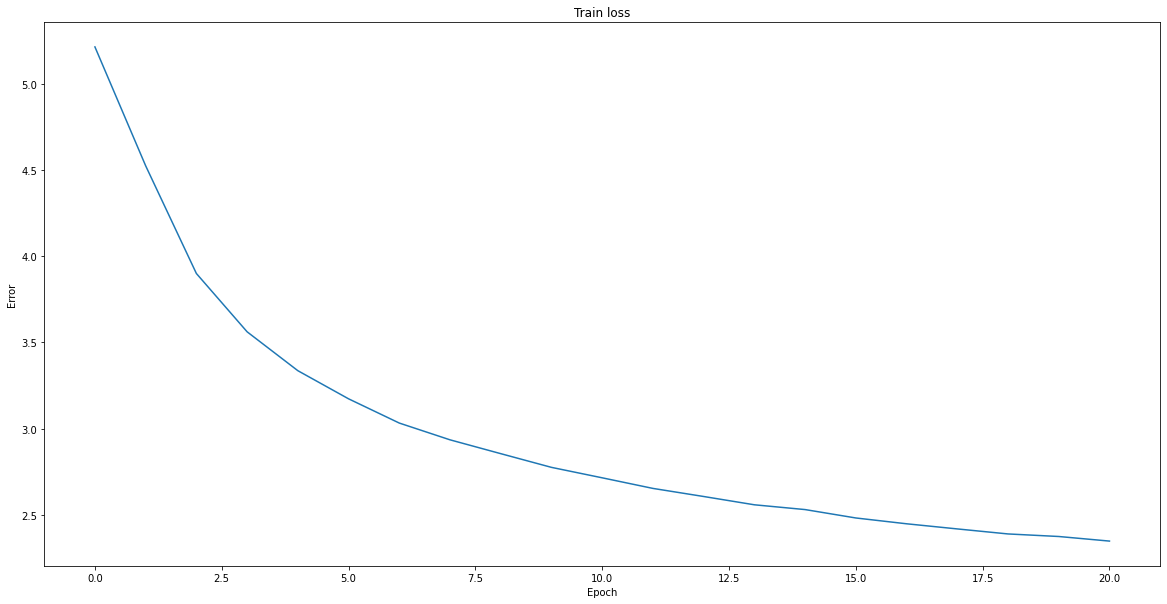
Test Loss 2.76\
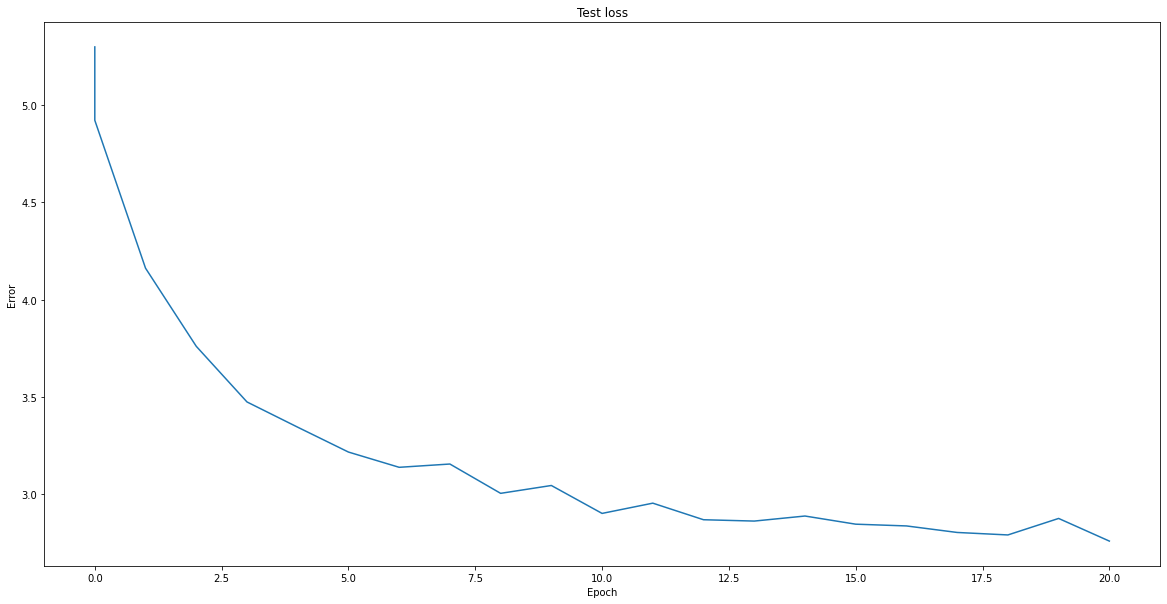
Test Accuracy 36%
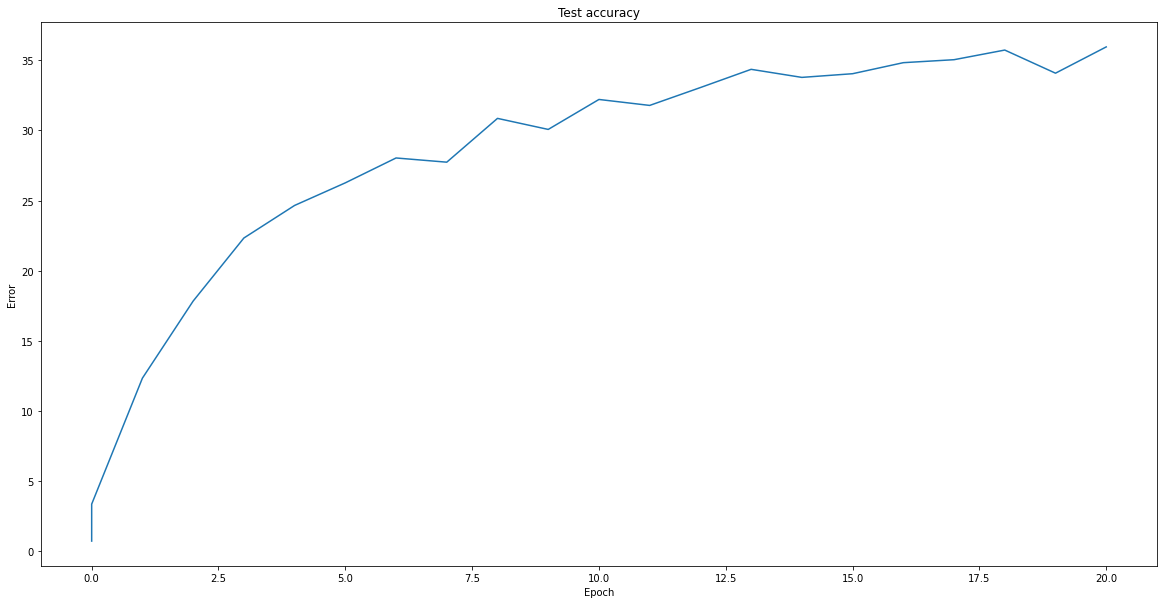
2. Were you able to use larger/deeper networks on TinyImageNet than you used on CIFAR and increase accuracy? If so, why? If not, why not?

Yes, we were able to increase accuracy on TinyImageNet by using larger/deeper networks than we used on CIFAR. We hypothesize that this is because in TinyImageNet, we have a larger label space, so we need to capture more granular information than we need for CIFAR, which suggested that we needed more parameters in our network by adding more layers and having larger convolutional layers. We also used maxpooling to reduce the number of learned parameters to mitigate potential overfitting.

3. The real ImageNet dataset has significantly larger images. How would you change your network design if the images were twice as large? How about smaller than Tiny ImageNet? How do you think your accuracy would change? This is open-ended, but we want a more thought-out answer than "I'd resize the images" or "I'd do a larger pooling stride." You don't have to write code to test your hypothesis.

Ideally, we want to take advantage of the extra information contained in the larger images, especially because ImageNet has a larger label space (1000 labels). So we would start off with larger blocks of convolutional layers (more channels) followed by maxpooling to limit the number of parameters the net would be learning. We would also use dropout layers to try and reduce the feature space because there will be a huge number of input features to the network when using larger convolutional layers.

If the images were smaller, we would consider using a combination of smaller convolutional layers and also resizing images to a larger size to take advantage of neural nets that have been designed for larger imagers. We would also probably try to eliminate maxpooling (as we did with CIFAR) to try and maximize the feature space from the smaller images.

For the larger images, we think the accuracy would decrease because we are more prone to overfitting by having more weights and learned parameters in the network. This is also supported by what we saw in the difference in test accuracies between the CIFAR and TinyImageNet datasets that we trained on in this Colab.

# Turn-in

Download your `hw1.ipynb` and put it in your `uwnet` repository.